<a href="https://colab.research.google.com/github/montassar668/Trip/blob/main/TripAdvisor_Sentiment_Analyse_KG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python3 -m spacy download fr

     |████████████████████████████████| 14.7MB 9.7MB/s 
  Created wheel for fr-core-news-sm: filename=fr_core_news_sm-2.2.5-cp36-none-any.whl size=14727027 sha256=0afd6be729246b0242b4d65065ff863650ddf17f9da4266f715e0711ac6adfc6
  Stored in directory: /tmp/pip-ephem-wheel-cache-nkc3haxd/wheels/46/1b/e6/29b020e3f9420a24c3f463343afe5136aaaf955dbc9e46dfc5
Successfully built fr-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/fr_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7MB 4.0MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.0-py2.py3-none-any.whl size=136694 sha256=7de87f24f20283a8b68950bded0076fb0af39faeceea5c7ceb1e057351416a11
  Stored in directory: /root/.cache/pip/wheels/5e/62/9d/e2d11b7e09f85508b7be451fa35a2bce4b12c66c10b8bcb182
Successfully built pyLDAvis


In [ ]:
import requests
from bs4 import BeautifulSoup
from lxml import html
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt
%matplotlib inline
# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [ ]:
import sys
from pprint import pprint

import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel

import nltk; nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('french')
stop_words.extend(['tre', 'vote', 'plusdate', 'part', 'soir', 'aout', 'septembre', 'utilepartage', 'tous', 'tout', 'site', 'responsable', 'hotel', 'egalement', 'equipe', 'sejour', 'geste', 'petit', 'willy', 'toujour', 'activite', 'beaucoup', 'prochaine', 'vacance', 'reviendron', 'propose', 'passer', 'grace', 'etablissement', 'ete', 'car', 'autre', 'semaine', 'enfant', 'vraiment', 'soin'])

warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

/usr/local/lib/python3.6/dist-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Scrapping customers reviews of Hotel Khayam Garden
Names = []
Titres = []
Avis = []
pages = []

x=0
while x in range(0, 50):

  page = requests.get('https://www.tripadvisor.fr/Hotel_Review-g317086-d3737374-Reviews-or'+str(x)+'-Khayam_Garden_Beach_Resort_and_Spa-Nabeul_Nabeul_Governorate')
  page_html = BeautifulSoup(page.text, 'html.parser')
  tree = html.fromstring(page.content)

  pages.append(tree.xpath('//li[@class="name-class-here"]/text()'))
  avis = page_html.find_all('div', class_='_3hDPbqWO')
  titres = page_html.find_all('a', class_='ocfR3SKN')
  names = page_html.find_all('a', class_='ui_header_link _1r_My98y')
  for i in range(0, 5):
    Names.append(names[i].text)
    Titres.append(titres[i].text)
    Avis.append(avis[i].text)
  
  print ("done page " + str(x))
  x=x+5

done page 0
done page 5
done page 10
done page 15
done page 20
done page 25
done page 30
done page 35
done page 40
done page 45


In [ ]:
Avis

["Nous avons séjourné à cet hôtel du 9 au 24 septembre et nous avons été très contents de l'accueil et de la chambre très spacieuse et très propre, avec balcon donnant sur l'entrée avec une vue sur la mer sur le côté gauche du balcon. Et cela suffit, car nous n'avons pas le bruit de la mer la nuit, lorsqu'elle est agitée. Parfait aussi en ce qui concerne le personnel (aussi bien dans les services de chambre, qu'aux services de table. Et pour finir, une très bonne équipe d'animation avec des jeunes qui ont envie de travailler et de faire plaisir. Nous recommandons vivement cet hôtel.PlusDate du séjour\xa0: septembre 2020Rapport qualité / prixPropretéServiceAstuce pour la chambre\xa0: Les chambres côté sud sont plus calmesAutres astuces sur les chambresUtilePartager ",
 'Hôtel propre et beau où toutes les mesures d’hygiène liées au Covid sont respectées.  Le personnel est sympathique ; réceptionnistes, femmes de ménage, maîtres nageurs (bigup à Youssef de la piscine couverte), personnels

In [ ]:
Names

['François A',
 'trotine6905',
 'Stephane O',
 'Lena',
 'marion v',
 'sarah m',
 'Christophe M',
 'LePionnierAmateur',
 'Farid B',
 'nadia',
 'Stephyben C',
 'Mélissa C',
 'patricia00037',
 'Stef B37',
 'Léa37',
 'aurelle37270',
 'jennifer D',
 'Aurore37',
 'vaness37',
 'Jeremie C',
 'Delphine',
 'Cédric l',
 'Emmanuelle V',
 'angel',
 'Mélanie S',
 'HediaCB',
 'Constance H',
 'JustineThuilliez',
 'Nadine R',
 'Quest11246057111',
 'isabelle',
 'stef6293',
 'Aur7li7',
 'BrendaM02',
 'Aurélie',
 'Vacancier breton',
 'Latifa L',
 'Auriane',
 'Pascal L',
 'Regine L',
 'Sabrina',
 'Severine C',
 'Dr_TRABELSI',
 'Steph_RSD',
 'bettina mas',
 'sandrine t',
 'Delpfine',
 'Patrick P',
 'Luc H',
 'Nicolas']

In [ ]:
Titres

['Séjour très agréable et sans souci',
 'Vacances Parfaites',
 'Une semaine excellente au Khayam garden beach.',
 'Superbe vacance !',
 'Séjours au top',
 'Au top!!',
 'Très bel hôtel et personnels au top',
 'Superbe séjour',
 'Excellent séjour',
 'Tunisie',
 'Famille Chesnel ',
 'Vacances entre copines',
 'EXCELLENT SEJOUR',
 'C est la famille',
 'SUPERBE séjour ',
 'AGREABLE SEJOUR',
 'Un séjour au top !',
 'Super séjour',
 'Très beau séjour ',
 'Un super séjour',
 'Que du bonheur',
 'Je recommande',
 'Stage karaté',
 "bel hotel mais beaucoup de disfonctionnement au sein de l'hotel",
 'ce sentir comme à la maison',
 'Excellent à tous points de vue',
 'Séjour agréable !',
 'Un super séjour !',
 'Excellent hôtel',
 'Super hotel a nabeul tunisie',
 'Séjour septembre 2020',
 'Magnifique ',
 'Magnifique séjour',
 'séjour parfait',
 'Superbe hotel',
 'Un peu déçus cette fois',
 'Séjour au Khayam Garden',
 'Hôtel super',
 'Essayez c’est l’adopter !',
 '3ème fois au Khayam et toujours au top

In [ ]:
#Create a DataFrame For customers reviews of Hotel Khayam Garden
df = pd.DataFrame(Names,columns=['Prénom']) 
df["Titres"] = Titres
df["Avis"] = Avis
df

,Prénom,Titres,Avis
0,François A,Séjour très agréable et sans souci,Nous avons séjourné à cet hôtel du 9 au 24 sep...
1,trotine6905,Vacances Parfaites,Hôtel propre et beau où toutes les mesures d’h...
2,Stephane O,Une semaine excellente au Khayam garden beach.,Nous rentrons tout juste du Khayam où nos avon...
3,Lena,Superbe vacance !,"Magnifique hôtel avec un magnifique cadre, un ..."
4,marion v,Séjours au top,Le personnel est toujours très sympa et souria...
5,sarah m,Au top!!,Super hôtel avec un personnel très agréable. ...
6,Christophe M,Très bel hôtel et personnels au top,L'équipe de l'hôtel est très agréable et aux p...
7,LePionnierAmateur,Superbe séjour,Nous avons profiter de cette période de m.... ...
8,Farid B,Excellent séjour,"Cadre agréable, hébergement très confortable, ..."
9,nadia,Tunisie,Superbe voyage l hôtel kayam garden est le top...


In [ ]:
df.to_csv ('Avis-khayam.csv', index = False, header=True)

In [ ]:
data=pd.read_csv('/content/Avis-khayam.csv')

In [ ]:
data.head()

,Prénom,Titres,Avis
0,François A,Séjour très agréable et sans souci,Nous avons séjourné à cet hôtel du 9 au 24 sep...
1,trotine6905,Vacances Parfaites,Hôtel propre et beau où toutes les mesures d’h...
2,Stephane O,Une semaine excellente au Khayam garden beach.,Nous rentrons tout juste du Khayam où nos avon...
3,Lena,Superbe vacance !,"Magnifique hôtel avec un magnifique cadre, un ..."
4,marion v,Séjours au top,Le personnel est toujours très sympa et souria...


In [ ]:
data.isnull().sum()

Prénom    0
Titres    0
Avis      0
dtype: int64

In [ ]:
#Tokenize Sentences and Cleaning
#Removing the emails, new line characters, single quotes and finally split the sentence into a list of words using gensim
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub(r'\W', ' ', str(sent))
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub(r'\s*\d*\s',' ', sent)  # Remove Nembers
        sent= re.sub(r'\s+[a-zA-Z]\s+', ' ', sent)  # remove all single characters: espace + Charcater + Espace 
        sent = re.sub(r'\s+', ' ', sent, flags=re.I)  #Substituting multiple spaces with single space
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data1 = data.Avis.values.tolist()
data_words = list(sent_to_words(data1))
print(data_words[:1])

[['nous', 'avons', 'sejourne', 'cet', 'hotel', 'du', 'au', 'septembre', 'et', 'nous', 'avons', 'ete', 'tres', 'contents', 'de', 'accueil', 'et', 'de', 'la', 'chambre', 'tres', 'spacieuse', 'et', 'tres', 'propre', 'avec', 'balcon', 'donnant', 'sur', 'entree', 'avec', 'une', 'vue', 'sur', 'la', 'mer', 'sur', 'le', 'cote', 'gauche', 'du', 'balcon', 'et', 'cela', 'suffit', 'car', 'nous', 'avons', 'pas', 'le', 'bruit', 'de', 'la', 'mer', 'la', 'nuit', 'lorsqu', 'elle', 'est', 'agitee', 'parfait', 'aussi', 'en', 'ce', 'qui', 'concerne', 'le', 'personnel', 'aussi', 'bien', 'dans', 'les', 'services', 'de', 'chambre', 'qu', 'aux', 'services', 'de', 'table', 'et', 'pour', 'finir', 'une', 'tres', 'bonne', 'equipe', 'animation', 'avec', 'des', 'jeunes', 'qui', 'ont', 'envie', 'de', 'travailler', 'et', 'de', 'faire', 'plaisir', 'nous', 'recommandons', 'vivement', 'cet', 'hotel', 'plusdate', 'du', 'sejour', 'septembre', 'rapport', 'qualite', 'pour', 'la', 'chambre', 'les', 'chambres', 'cote', 'sud',

In [ ]:
#Build the Bigram, Trigram Models and Lemmatize
#lemmatize each word to its root form, keeping only nouns, adjectives, verbs and adverbs
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)
 
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
# remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
#Build the Topic Model
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=4, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.029*"chaleureux" + 0.021*"barriere" + 0.020*"durant" + 0.017*"comme" + '
  '0.017*"qualite" + 0.015*"excellent" + 0.015*"dejeuner" + 0.013*"grand" + '
  '0.010*"chambre" + 0.009*"service"'),
 (1,
  '0.042*"animateur" + 0.034*"top" + 0.018*"attention" + 0.018*"programme" + '
  '0.017*"aimable" + 0.016*"adore" + 0.015*"excellent" + 0.014*"pass" + '
  '0.014*"spectacle" + 0.014*"habitude"'),
 (2,
  '0.092*"personnel" + 0.040*"restauration" + 0.035*"agreable" + '
  '0.025*"present" + 0.023*"propre" + 0.023*"sabeur" + 0.021*"animation" + '
  '0.021*"super" + 0.019*"jeux" + 0.015*"chambre"'),
 (3,
  '0.050*"disponible" + 0.043*"souriant" + 0.040*"top" + 0.037*"animation" + '
  '0.031*"nourriture" + 0.023*"formidable" + 0.022*"gentil" + '
  '0.020*"spacieuse" + 0.017*"restaurant" + 0.015*"sanitaire"')]


In [ ]:
#Display the Dominant topic and its percentage contribution in each document
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,3.0,0.9447,"disponible, souriant, top, animation, nourritu...","[spacieuse, propre, balcon, donnant, agitee, s..."
1,1,2.0,0.9818,"personnel, restauration, agreable, present, pr...","[liee, respectee, personnel, sympathique, rece..."
2,2,2.0,0.9796,"personnel, restauration, agreable, present, pr...","[situation, bord, pie, prestation, assure, per..."
3,3,3.0,0.9039,"disponible, souriant, top, animation, nourritu...","[irreprochable, serviable, souriant, nourritur..."
4,4,3.0,0.9056,"disponible, souriant, top, animation, nourritu...","[souriant, nourriture, animation, soiree, top,..."
5,5,2.0,0.9530,"personnel, restauration, agreable, present, pr...","[super, personnel, agreable, ambiance, choucho..."
6,6,2.0,0.7492,"personnel, restauration, agreable, present, pr...","[agreable, ptit]"
7,7,3.0,0.8108,"disponible, souriant, top, animation, nourritu...","[choose, top, agitee]"
8,8,2.0,0.9370,"personnel, restauration, agreable, present, pr...","[agreable, hebergement, confortable, restaurat..."
9,9,3.0,0.8732,"disponible, souriant, top, animation, nourritu...","[top, prestation, superbe, soignant, disponible]"


In [ ]:
#Display the most representative sentence for each topic
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9658,"chaleureux, barriere, durant, comme, qualite, excellent, dejeuner, grand, chambre, service","[prise, temperature, application, chaleureux, reception, excellent, jus, rafraichissant, barrier..."
1,1.0,0.8749,"animateur, top, attention, programme, aimable, adore, excellent, pass, spectacle, habitude","[film, spectacle, peut, danser, massagiste]"
2,2.0,0.9818,"personnel, restauration, agreable, present, propre, sabeur, animation, super, jeux, chambre","[liee, respectee, personnel, sympathique, receptionniste, femme, menage, maitre, nageur, personn..."
3,3.0,0.9447,"disponible, souriant, top, animation, nourriture, formidable, gentil, spacieuse, restaurant, san...","[spacieuse, propre, balcon, donnant, agitee, service, table, finir, animation, cote, sud, calmes..."


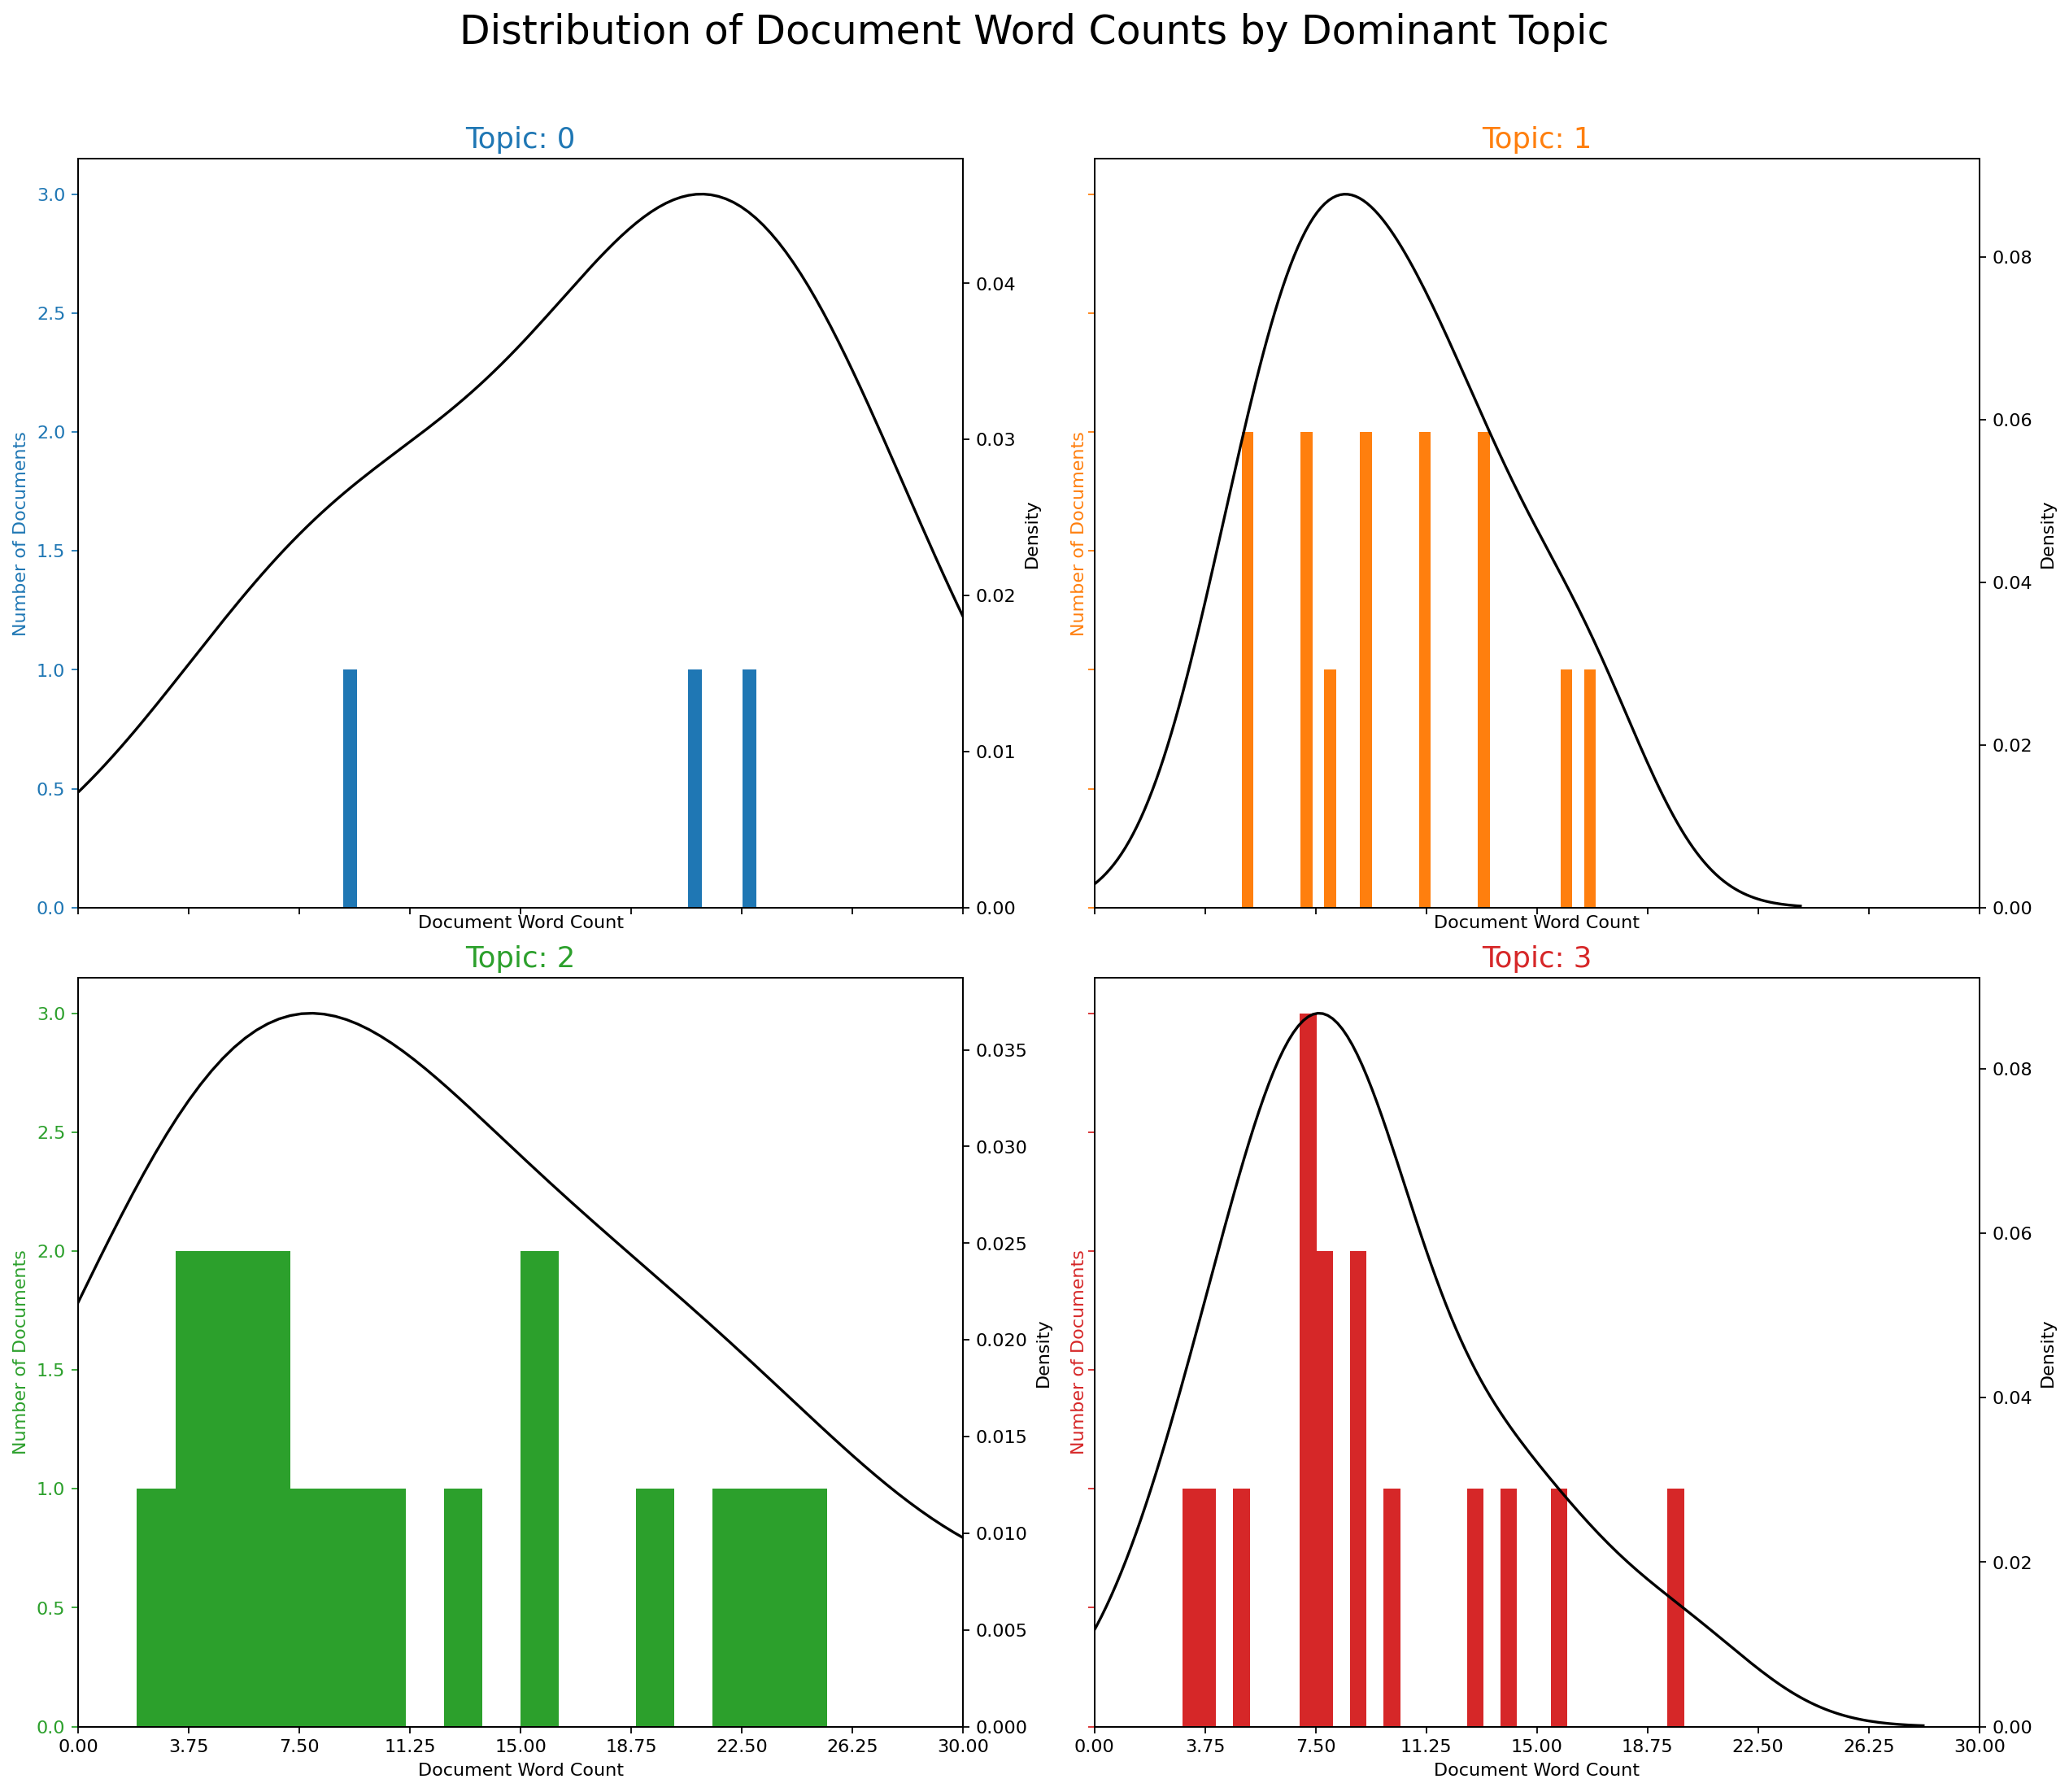

In [ ]:
#Frequency Distribution of Word Counts in Documents
#Try to know how big the documents are as a whole and by topic
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 30, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 30), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,30,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

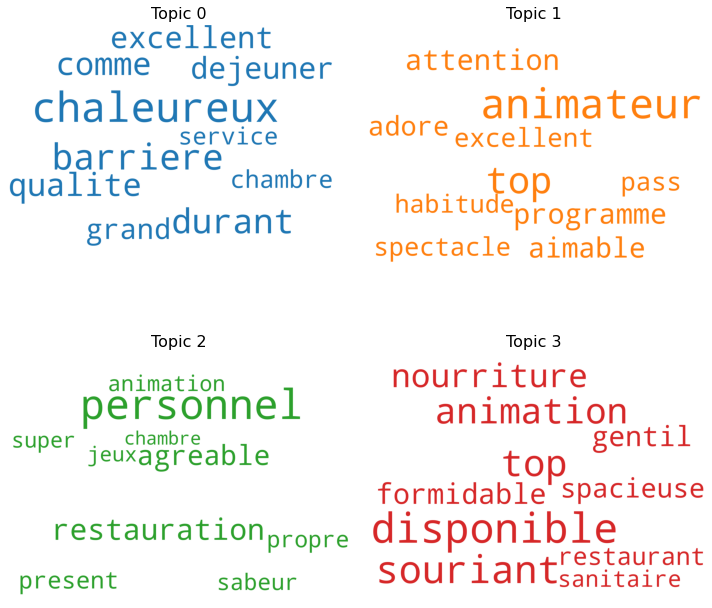

In [ ]:
# Word Clouds of Top N Keywords in Each Topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

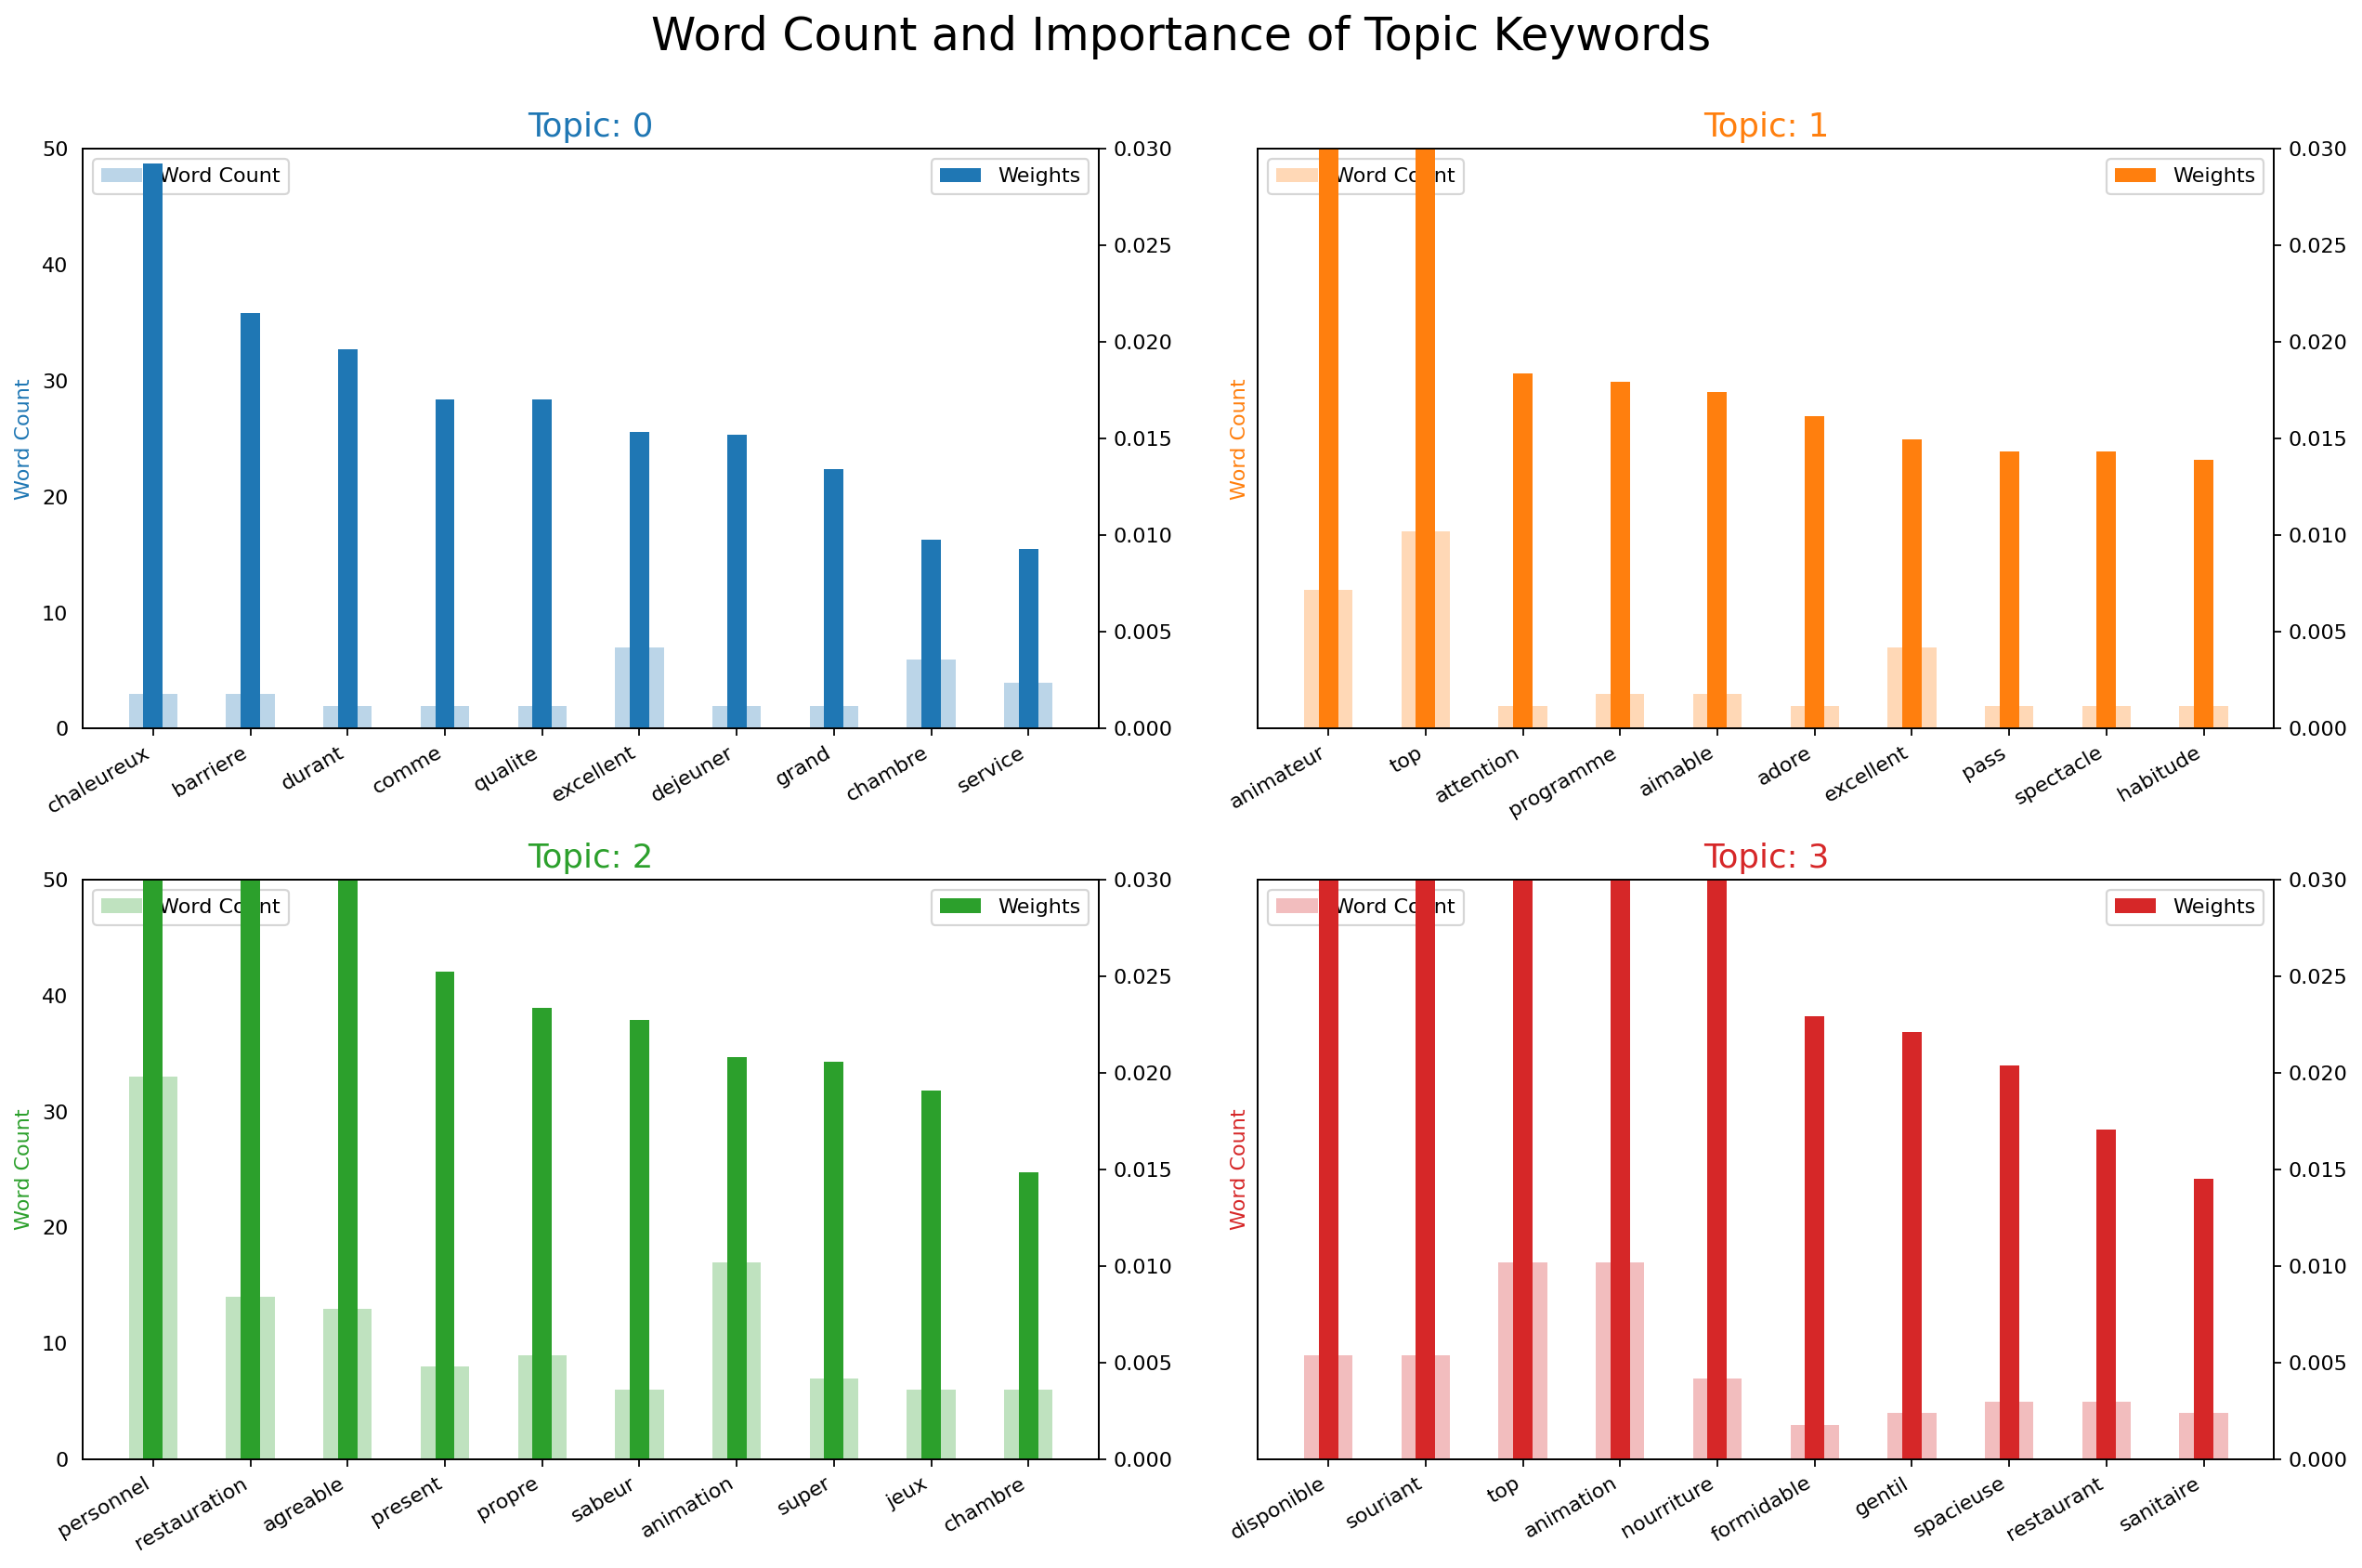

In [ ]:
#Word Counts of Topic Keywords

from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 50)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

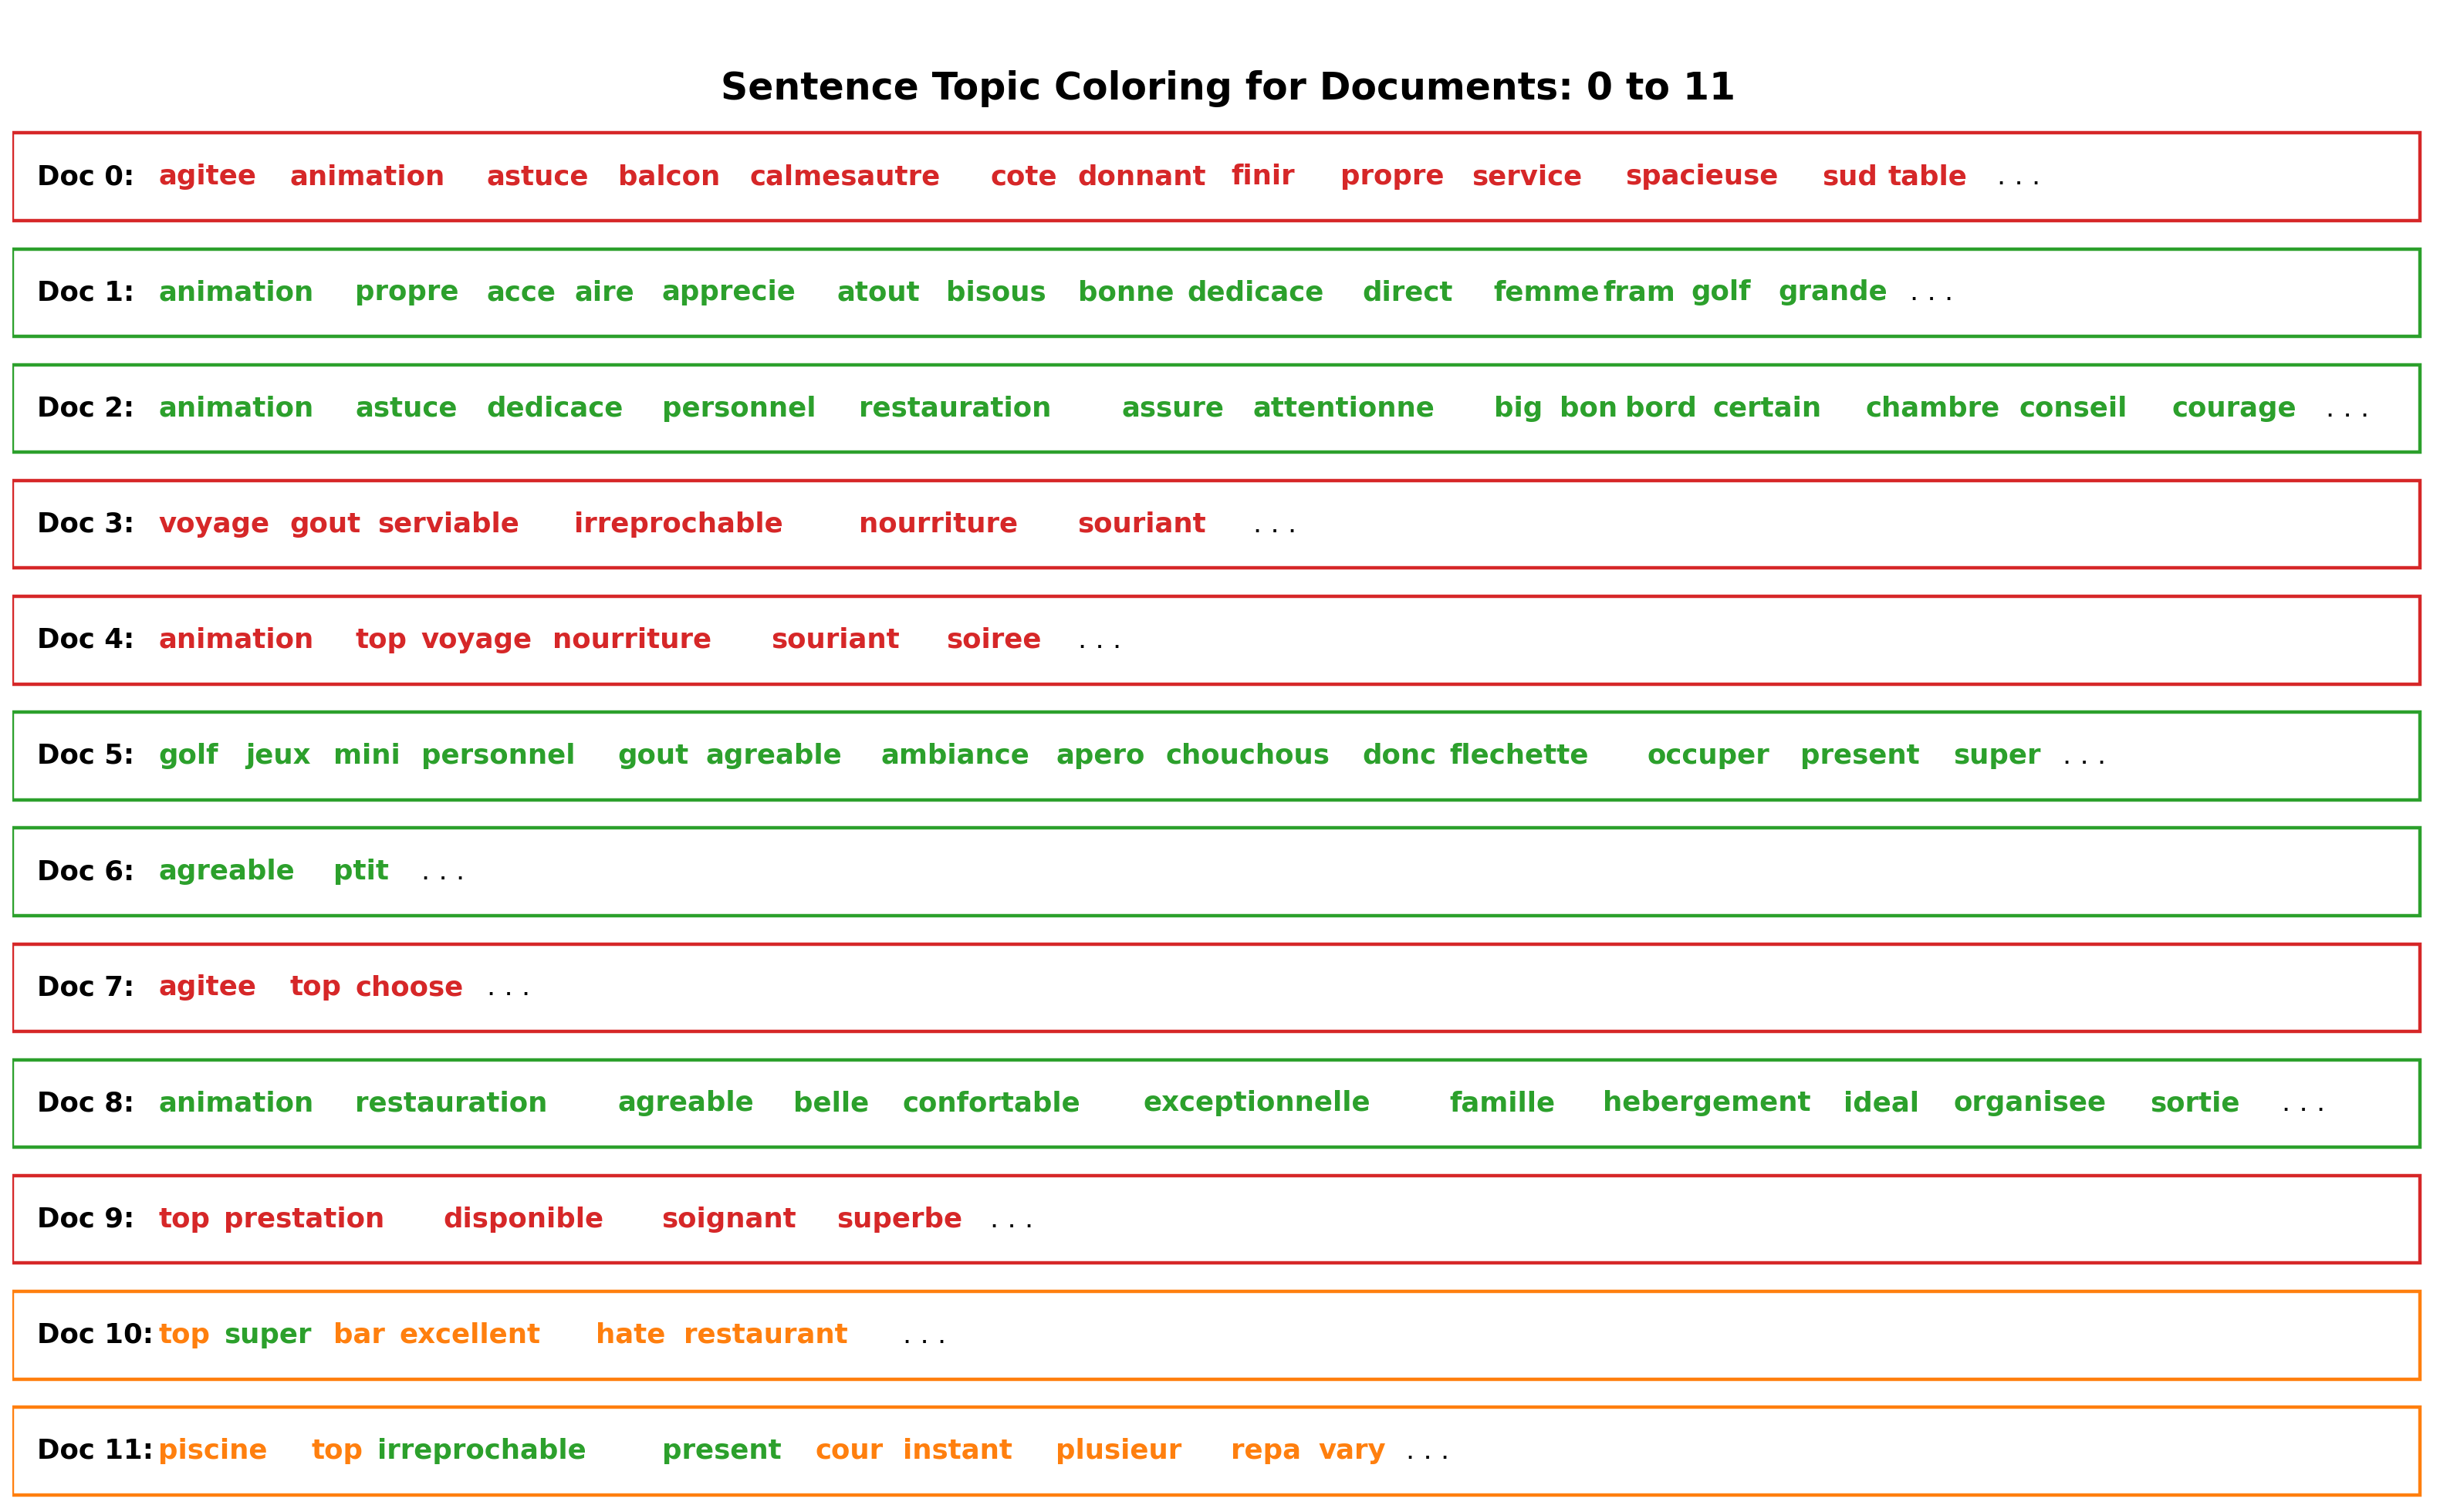

In [ ]:
# Sentence Coloring of N Sentences

from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [ ]:
# What are the most discussed topics in the documents
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

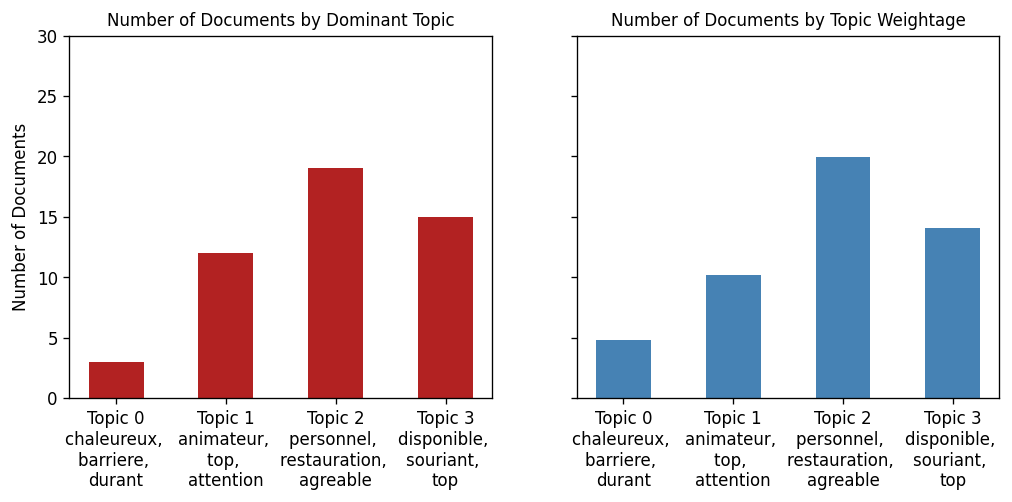

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 30)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# t-SNE Clustering Chart (t-distributed stochastic neighbor embedding) algorithm
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=500, plot_height=400)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 49 nearest neighbors...
[t-SNE] Indexed 50 samples in 0.000s...
[t-SNE] Computed neighbors for 50 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 50 / 50
[t-SNE] Mean sigma: 0.649228
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.468765
[t-SNE] KL divergence after 1000 iterations: 0.301369


In [ ]:
#pyLDAVis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.180469  0.020372       1        1  47.874349
3      0.045488 -0.147222       2        1  22.512296
1      0.100322  0.091023       3        1  17.842661
0      0.034659  0.035827       4        1  11.770694, topic_info=           Term       Freq      Total Category  logprob  loglift
33    personnel  26.000000  26.000000  Default  30.0000  30.0000
99   disponible   7.000000   7.000000  Default  29.0000  29.0000
77     souriant   6.000000   6.000000  Default  28.0000  28.0000
112   animateur   8.000000   8.000000  Default  27.0000  27.0000
45          top  11.000000  11.000000  Default  26.0000  26.0000
..          ...        ...        ...      ...      ...      ...
9       service   0.650164   2.460322   Topic4  -4.6779   0.8087
55      chambre   0.684858   5.214617   Topic4  -4.6259   0.1095
18        bonne   0.629676   3.037083   Topic4  -4.7099   0.5661
12        table   0.597224   1.412050   Topic4  -4.7628   1.2791
135      client   0.596068   1.463094   Topic4  -4.7647   1.2416

[177 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
184       4  0.913294  accompagnee
185       4  0.913294     adorable
213       3  0.905551        adore
79        1  0.960106     agreable
160       4  0.913095      ailleur
...     ...       ...          ...
46        1  0.899900        toute
115       3  0.599871        venon
296       3  0.649280       visite
47        1  0.369114       voyage
47        2  0.369114       voyage

[160 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 2, 1])

In [ ]:
#je vais utilisée le textblob pour analyser les titres des commentaires clients
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
df1 = data.Titres
df1

0                                  Séjour très agréable et sans souci
1                                                  Vacances Parfaites
2                      Une semaine excellente au Khayam garden beach.
3                                                   Superbe vacance !
4                                                      Séjours au top
5                                                            Au top!!
6                                 Très bel hôtel et personnels au top
7                                                      Superbe séjour
8                                                    Excellent séjour
9                                                             Tunisie
10                                                   Famille Chesnel 
11                                             Vacances entre copines
12                                                   EXCELLENT SEJOUR
13                                                   C est la famille
14                  

In [ ]:
def get_scores(Titres):
    blob = TextBlob(Titres)
    
    return pd.Series({
        'Titres': Titres,
        'textblob': blob.sentiment.polarity,
    })

scores = df1.apply(get_scores)
scores.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

,Titres,textblob
0,Séjour très agréable et sans souci,0.000000
1,Vacances Parfaites,0.000000
2,Une semaine excellente au Khayam garden beach.,0.000000
3,Superbe vacance !,0.000000
4,Séjours au top,0.500000
5,Au top!!,0.781250
6,Très bel hôtel et personnels au top,0.500000
7,Superbe séjour,0.000000
8,Excellent séjour,1.000000
9,Tunisie,0.000000
